In [1]:
#we use the following libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Measures of Dispersion**

The measures of central tendency, such as the mean, median and mode, do not reveal the whole picture of the distribution of a data set. Two data sets with the same mean may have completely different spreads. The variation among the values of observations for one data set may be much larger or smaller than for the other data set. Thus, the mean, median or mode by itself is usually not a sufficient measure to reveal the shape of the distribution of a data set. We also need a measure than can provide some information about the variation among data values. These measures are called the **measures of dispersion**. The measures of central tendency and dispersion taken together give a better picture of a data set than the measures of central tendency alone.

**Variance and Standard Deviation**

The **variance** is the average squared deviation from the mean. The variance for population data is denoted by $\sigma^2$, and the variance calculated for sample data is denoted by $s^2$.

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{N} $$

and 

$$ s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1} $$

where $\sigma^2$ is the population variance and $s^2$ is the sample variance. The quantity $x_i - \mu$ or $x_i - \bar{x}$ in the above formulas is called the deviation of the $x_i$ value $(x_i,x_2,\dots,x_n)$ from the mean.

The **standard deviation** is the most-used measure of dispersion. The value of the standard deviation tells how closely the values of a data set are clustered around the mean. In general, a lower value of the standard deviation for a data set indicated that the values of that data set are spread over a relatively smaller range around the mean. In contrast, a larger value of the standard deviation for a data set indicated that the values of that data set are spread over  a relatively larger range around the mean.

![spread](spread_around_mean.png)

The standard deviation is obtained by taking the square root of the **variance**. Consequently, the standard deviation calculated for population data is denoted by $\sigma$ and the standard deviation calculated for sample data is denoted by s:

$$ \sqrt{\sigma^2 = \frac{\sum_{i=1}^n (x_i - \mu)^2}{N}} $$

and 

$$  \sqrt{s^2 = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}. $$


In [2]:
#FU Berlin student data set. 

students_df = pd.read_csv("students.csv")

students_df.head(10)

,stud.id,name,gender,age,height,weight,religion,nc.score,semester,major,minor,score1,score2,online.tutorial,graduated,salary
1,833917,"Gonzales, Christina",Female,19,160,64.8,Muslim,1.91,1st,Political Science,Social Sciences,NaN,NaN,0,0,NaN
2,898539,"Lozano, T'Hani",Female,19,172,73.0,Other,1.56,2nd,Social Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
3,379678,"Williams, Hanh",Female,22,168,70.6,Protestant,1.24,3rd,Social Sciences,Mathematics and Statistics,45.0,46.0,0,0,NaN
4,807564,"Nem, Denzel",Male,19,183,79.7,Other,1.37,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
5,383291,"Powell, Heather",Female,21,175,71.4,Catholic,1.46,1st,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN
6,256074,"Perez, Jadrian",Male,19,189,85.8,Catholic,1.34,2nd,Political Science,Mathematics and Statistics,NaN,NaN,0,0,NaN
7,754591,"Clardy, Anita",Female,21,156,65.9,Protestant,1.11,2nd,Political Science,Social Sciences,NaN,NaN,0,0,NaN
8,146494,"Allen, Rebecca Marie",Female,21,167,65.7,Other,2.03,3rd,Political Science,Economics and Finance,58.0,62.0,0,0,NaN
9,723584,"Tracy, Robert",Male,18,195,94.4,Other,1.29,3rd,Economics and Finance,Environmental Sciences,57.0,67.0,0,0,NaN
10,314281,"Nimmons, Laura",Female,18,165,66.0,Orthodox,1.19,2nd,Environmental Sciences,Mathematics and Statistics,NaN,NaN,0,0,NaN


In [3]:
#variance and standard deviation in pandas

print(students_df[['age', 'nc.score', 'height', 'weight']].var(), '\n')

print(students_df[['age', 'nc.score', 'height', 'weight']].std()) #this is the sample standard deviation by default

age          36.785568
nc.score      0.658610
height      122.711652
weight       74.566017
dtype: float64 

age          6.065111
nc.score     0.811548
height      11.077529
weight       8.635162
dtype: float64


In [4]:
#sample standard deviation
print(np.std([1,2,3,4,5,6,7,8,9,10], ddof=1))

#standard deviation
print(np.std([1,2,3,4,5,6,7,8,9,10]))

3.0276503540974917
2.8722813232690143


**Use of the Standard Deviation**

By using the **mean** and standard deviation, we can find the proportion or percentage of the total observations that fall within a given interval about the mean.

**Chebyshev's Theorem**

Chebyshev's theorem gives a lower bound for the area under a curve between two points that are on opposite sides of the mean and at the same distance from the mean.

> For any number $k$ greater than $1$, at least $1- 1/k^2$ of the data lie within $k$ standard deviations of the mean.

**Probabilistic statement**

Let $X$ be a random variable with finite expected value with finite expected value $\mu$ and finite non-zero variance $\sigma^2$. Then for any real number $k>0$,

$$\text{Pr}(\lvert X - \mu \rvert \geq k \sigma) \leq \frac{1}{k^2}$$.

Only the case $k>1$ is useful. When $k \leq 1$, the right-hand side $\frac{1}{k^2} \geq 1$ and the inequality is trivial as all probabilities are $\leq 1$. 

As an example, using $k = \sqrt{2}$ shows that the probability that values lie outside the interval $(\mu - \sqrt{2}\sigma, \mu + \sqrt{2}\sigma)$ does not exceed $\frac{1}{2}$.

If $k=2$, this means that at least $75\%$ of the data values lie within $2$ **standard deviations** of the mean. 

The theorem applies to both sample and population data and the theorem is applicable to a distribution of any shape. 

In [5]:
# chebyshev's theorem implemented in python

k = np.arange(1,4.1,0.1) #evenly spaced values, excluding 4.1

# area under curve
auc = np.round((1 - (1/k**2))*100)

chebyshev = {'k': k, 'auc.percent': auc}

chebyshev_df = pd.DataFrame(chebyshev)

# set index starting at 1
chebyshev_df.index = np.arange(1, len(chebyshev_df) + 1)

chebyshev_df

,k,auc.percent
1,1.0,0.0
2,1.1,17.0
3,1.2,31.0
4,1.3,41.0
5,1.4,49.0
6,1.5,56.0
7,1.6,61.0
8,1.7,65.0
9,1.8,69.0
10,1.9,72.0


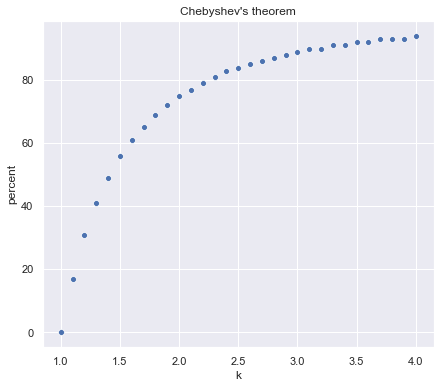

In [6]:
sns.set(rc={'figure.figsize':(7,6)})

sns.scatterplot(chebyshev_df['k'], chebyshev_df['auc.percent'])
plt.title('Chebyshev\'s theorem')
plt.xlabel('k')
plt.ylabel('percent')

pass

**Empirical Rule**

Whereas Chebyshev's theorem is applicable to any kind of distribution, the **empirical rule** applies to a specific type of distribution called the **bell-shaped distribution** or **normal distribution**. There are $3$ rules:

For a bell-shaped distribution, approximately

1. 68% of the observations lie within one standard deviation of the mean.
2. 95% of the observations lie within two standard deviations of the mean.
3. 99.7% of the observations lie within three standard deviations of the mean.

In [7]:
# sampling from a normal distribution in python

# mean, std, size
np.random.normal(0,1,size=10)

array([ 1.85265252,  0.05756087, -0.6199544 , -1.3064027 , -0.85734728,
        0.96457964, -0.24779227,  1.78346907,  0.66461631,  3.02223631])

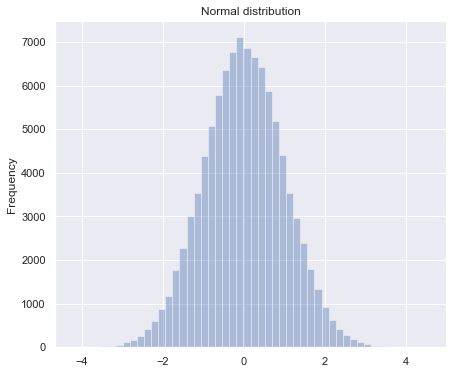

In [8]:
sns.distplot(a=np.random.normal(0,1,size=100000), kde=False)
plt.title('Normal distribution')
plt.ylabel('Frequency')

pass

In [9]:
# we empirically verify the empirical rule in python

norm = np.random.normal(0,1,size=100000)

# percentage of values in norm that lie within 1 std from the mean
sd1 = len([x for x in norm if x > -1 and x < 1])/len(norm) * 100

sd2 = len([x for x in norm if x > -2 and x < 2])/len(norm) * 100
sd3 = len([x for x in norm if x > -3 and x < 3])/len(norm) * 100

empirical_dict = {'std': ['1sd', '2sd', '3sd'], 'perc': [sd1, sd2, sd3]}

empirical_df = pd.DataFrame(empirical_dict)

empirical_df

,std,perc
0,1sd,68.067
1,2sd,95.363
2,3sd,99.764


We now visually represent the empirical rule in python. Note that the histogram below does not show counts on the $y$-axix anymore, but the density values (normalized count divided by bin width), which means that the bar areas sum to $1$. Recall that the The normalized count is the count in a class divided by the total number of observations.

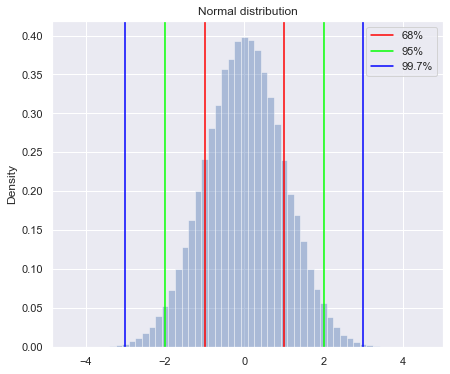

In [10]:
sns.distplot(a=np.random.normal(0,1,size=100000), kde_kws = {'alpha' : 0.0}) #kernel density estimate made transparent
plt.title('Normal distribution')
plt.ylabel('Density')
plt.axvline(x = -1, color = 'red', label = '68%')
plt.axvline(x = 1, color = 'red')
plt.axvline(x = -2, color = 'lime', label = '95%')
plt.axvline(x = 2, color = 'lime')
plt.axvline(x = -3, color = 'blue', label = '99.7%')
plt.axvline(x = 3, color = 'blue')
plt.legend()

pass 

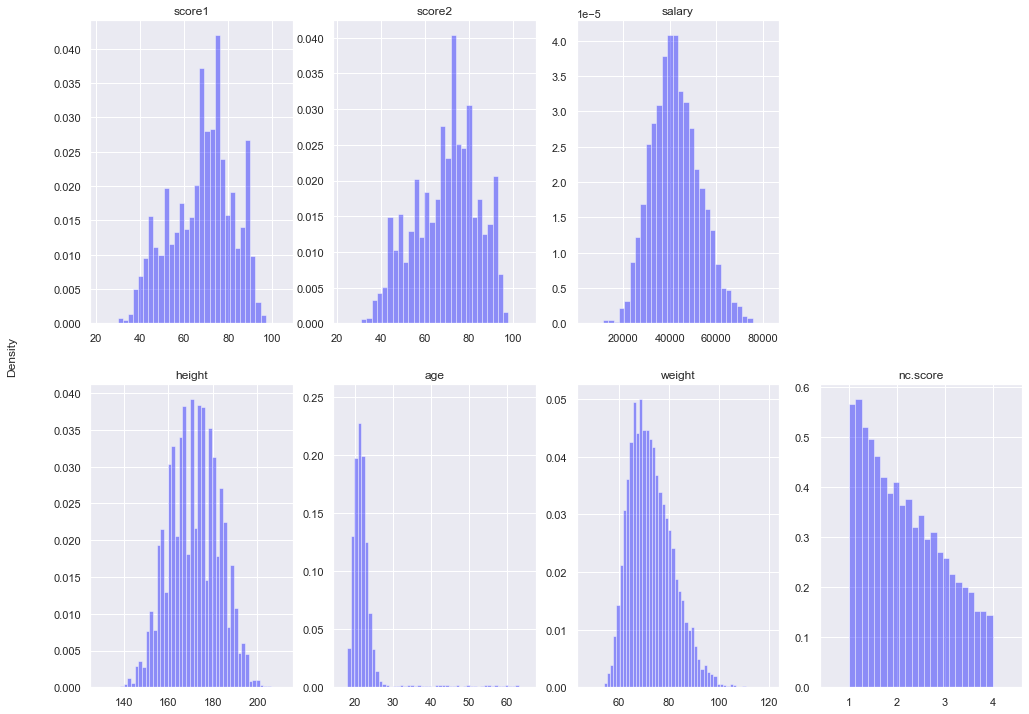

In [11]:
# we plot the distribution of each numerical variable in 
# the student's data set

sns.set(rc={'figure.figsize':(16.7,12.27)})


fig, axs = plt.subplots(2,4)
sns.distplot(students_df['score1'], kde_kws = {'alpha' : 0.0}, ax=axs[0,0], color = 'blue')
axs[0,0].set_title('score1')
axs[0,0].set_xlabel('')
sns.distplot(students_df['score2'], kde_kws = {'alpha' : 0.0}, ax=axs[0,1], color = 'blue')
axs[0,1].set_title('score2')
axs[0,1].set_xlabel('')
sns.distplot(students_df['salary'], kde_kws = {'alpha' : 0.0}, ax=axs[0,2], color = 'blue')
axs[0,2].set_title('salary')
axs[0,2].set_xlabel('')
sns.distplot(students_df['height'], kde_kws = {'alpha' : 0.0}, ax=axs[1,0], color = 'blue')
axs[1,0].set_title('height')
axs[1,0].set_xlabel('')
sns.distplot(students_df['age'], kde_kws = {'alpha' : 0.0}, ax=axs[1,1], color = 'blue')
axs[1,1].set_title('age')
axs[1,1].set_xlabel('')
sns.distplot(students_df['weight'], kde_kws = {'alpha' : 0.0}, ax=axs[1,2], color = 'blue')
axs[1,2].set_title('weight')
axs[1,2].set_xlabel('')
sns.distplot(students_df['nc.score'], kde_kws = {'alpha' : 0.0}, ax=axs[1,3], color = 'blue')
axs[1,3].set_title('nc.score')
axs[1,3].set_xlabel('')
axs[0,3].axis('off')
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical')


pass

We realize immdediately, that some variables are positively skewed, thus we exclude them and keep those that appear to be normally distributed.

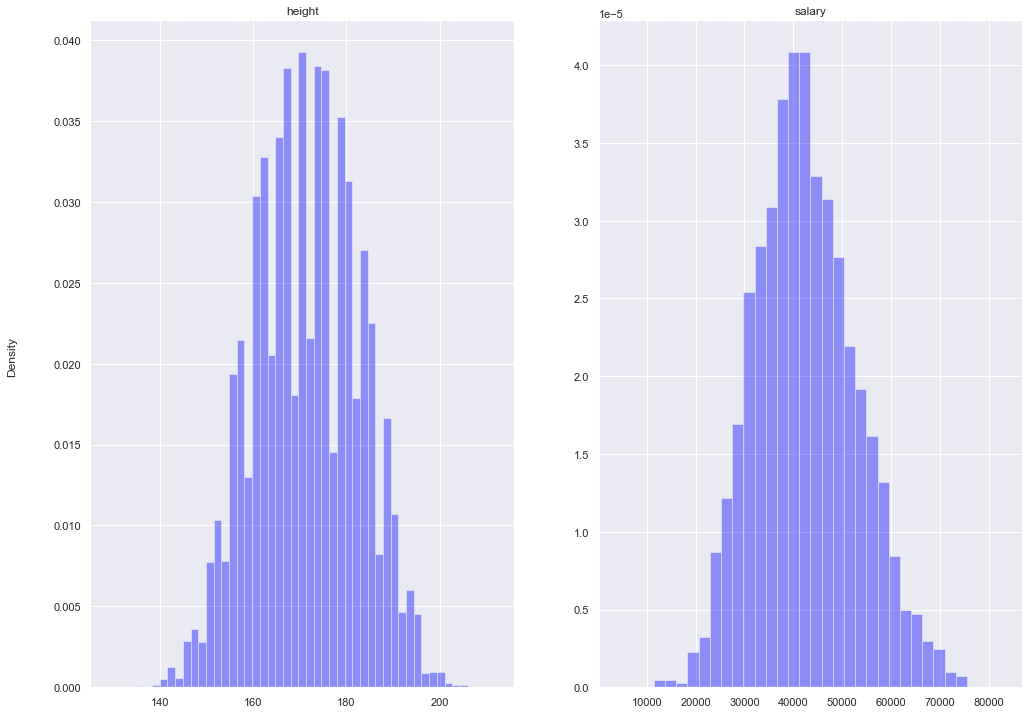

In [12]:
sns.set(rc={'figure.figsize':(16.7,12.27)})

fig, axs = plt.subplots(1,2)
sns.distplot(students_df['height'], kde_kws = {'alpha' : 0.0}, ax=axs[0], color = 'blue')
axs[0].set_title('height')
axs[0].set_xlabel('')
sns.distplot(students_df['salary'], kde_kws = {'alpha' : 0.0}, ax=axs[1], color = 'blue')
axs[1].set_title('salary')
axs[1].set_xlabel('')
fig.text(0.06, 0.5, 'Density', ha='center', va='center', rotation='vertical')

pass


Well, both the height and the salary variable seem to be more  or less normally distributed. Now we pick the salary variable for further analysis. We check to see if the three empirical rules claimed above are valid.

In [13]:
# checking the empirical rule for salary variable in the student data set


salary = students_df['salary'].dropna()
std = salary.std()
mean = salary.mean()

# percentage of values in norm that lie within 1 std from the mean
sd1 = len([x for x in salary if x > mean-std and x < mean +std])/len(salary) * 100

sd2 = len([x for x in salary if x > mean - 2*std and x < mean + 2*std])/len(salary) * 100
sd3 = len([x for x in salary if x > mean - 3*std and x < mean + 3*std])/len(salary) * 100

empirical_dict = {'std': ['1sd', '2sd', '3sd'], 'perc': [sd1, sd2, sd3]}

empirical_df = pd.DataFrame(empirical_dict)

empirical_df

,std,perc
0,1sd,67.084997
1,2sd,95.607530
2,3sd,99.771820


So quite close! The salary variables shows a strong tendeny to support the so called empirical rule. We now plot the histogram of the variable along with the kernel density estimation (KDE) and conclude salary variable in the students data set is roughly normal distributed.

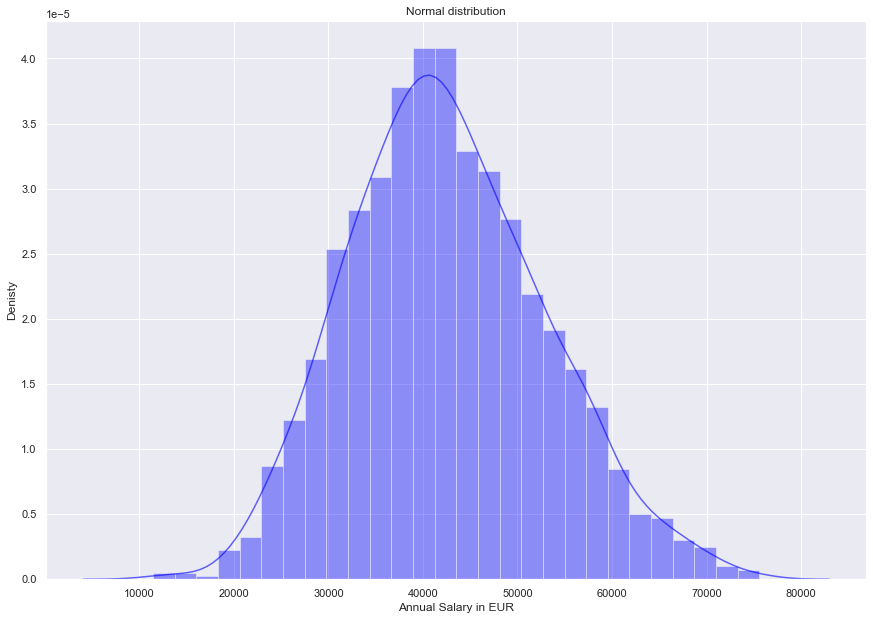

In [14]:
sns.set(rc={'figure.figsize':(14.7,10.27)})

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

sns.distplot(students_df['salary'], kde_kws = {'alpha' : 0.6}, color = 'blue')
plt.xlabel('Annual Salary in EUR')
plt.ylabel('Denisty')
plt.title('Normal distribution')

pass

**The Range**

The **range** as a measure of dispersion is simple to calculate. It is obtained by taking the difference between the largest and the smallest values in a data set.

<center> Range  = Largest value - Smallest value </center>

In [15]:
# calculating range using Pandas

import pandas as pd

num_student = students_df[['age', 'nc.score', 'height', 'weight']]

range_student = num_student.max() - num_student.min()

range_student

age         46.0
nc.score     3.0
height      71.0
weight      64.6
dtype: float64

The range, like the mean, has the disadvantage of being influenced by outliers. Consequently, the range is not a good measure of dispersion to use for a data set that contains outliers. Another disadvantage of using range as a measure of dispersion is that its calculation is based on two values only: the largest and the smallest. All other values in a data set are ignored when calculating its range. Thus, the range is not a very satisfactory measure of dispersion.